In [1]:
text = "Women education is a catch all term which refers to the state of primary, secondary, tertiary and health education in girls and women. There are 65 Million girls out of school across the globe; majority of them are in the developing and underdeveloped countries. All the countries of the world, especially the developing and underdeveloped countries must take necessary steps to improve their condition of female education; as women can play a vital role in the nation’s development. If we consider society as tree, then men are like its strong main stem which supports the tree to face the elements and women are like its roots; most important of them all. The stronger the roots are the bigger and stronger the tree will be spreading its branches; sheltering and protecting the needy. Women are the soul of a society; a society can well be judged by the way its women are treated. An educated man goes out to make the society better, while an educated woman; whether she goes out or stays at home, makes the house and its occupants better. Women play many roles in a society- mother, wife, sister, care taker, nurse etc. They are more compassionate towards the needs of others and have a better understanding of social structure. An educated mother will make sure that her children are educated, and will weigh the education of a girl child, same as boys. History is replete with evidences, that the societies in which women were treated equally to men and were educated; prospered and grew socially as well as economically. It will be a mistake to leave women behind in our goal of sustainable development, and it could only be achieved if both the genders are allowed equal opportunities in education and other areas. Education makes women more confident and ambitious; they become more aware of their rights and can raise their voice against exploitation and violence. A society cannot at all progress if its women weep silently. They have to have the weapon of education to carve out a progressive path for their own as well as their families."
text

'Women education is a catch all term which refers to the state of primary, secondary, tertiary and health education in girls and women. There are 65 Million girls out of school across the globe; majority of them are in the developing and underdeveloped countries. All the countries of the world, especially the developing and underdeveloped countries must take necessary steps to improve their condition of female education; as women can play a vital role in the nation’s development. If we consider society as tree, then men are like its strong main stem which supports the tree to face the elements and women are like its roots; most important of them all. The stronger the roots are the bigger and stronger the tree will be spreading its branches; sheltering and protecting the needy. Women are the soul of a society; a society can well be judged by the way its women are treated. An educated man goes out to make the society better, while an educated woman; whether she goes out or stays at home,

In [2]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)
sentences

['Women education is a catch all term which refers to the state of primary, secondary, tertiary and health education in girls and women.',
 'There are 65 Million girls out of school across the globe; majority of them are in the developing and underdeveloped countries.',
 'All the countries of the world, especially the developing and underdeveloped countries must take necessary steps to improve their condition of female education; as women can play a vital role in the nation’s development.',
 'If we consider society as tree, then men are like its strong main stem which supports the tree to face the elements and women are like its roots; most important of them all.',
 'The stronger the roots are the bigger and stronger the tree will be spreading its branches; sheltering and protecting the needy.',
 'Women are the soul of a society; a society can well be judged by the way its women are treated.',
 'An educated man goes out to make the society better, while an educated woman; whether she g

In [3]:
import warnings
warnings.filterwarnings('ignore')
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('bert-base-nli-mean-tokens')
embeddings = model.encode(sentences)
embeddings = [e.tolist() for e in embeddings]
embeddings = np.array(embeddings)
embeddings

I0511 13:36:31.909384 15456 file_utils.py:38] PyTorch version 1.0.1 available.
I0511 13:36:41.056891 15456 SentenceTransformer.py:29] Load pretrained SentenceTransformer: bert-base-nli-mean-tokens
I0511 13:36:41.057891 15456 SentenceTransformer.py:32] Did not find a '/' or '\' in the name. Assume to download model from server.
I0511 13:36:41.058888 15456 SentenceTransformer.py:67] Load SentenceTransformer from folder: C:\Users\tania/.cache\torch\sentence_transformers\public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip
I0511 13:36:41.108755 15456 configuration_utils.py:283] loading configuration file C:\Users\tania/.cache\torch\sentence_transformers\public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip\0_BERT\config.json
I0511 13:36:41.109752 15456 configuration_utils.py:321] Model config BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 

array([[ 0.52894419,  0.62002289, -0.22723746, ..., -0.44440284,
         0.02108064,  0.45691839],
       [-0.4996101 ,  0.52445799, -1.05271137, ..., -0.25531965,
         0.44441262,  0.10751349],
       [-0.28842628,  0.41527712,  0.01674762, ..., -0.89968109,
        -0.80288339, -0.02522408],
       ...,
       [ 0.01264526,  0.01355256,  0.52331626, ..., -0.51270384,
        -0.78580391, -0.394142  ],
       [ 0.23613521,  1.22433734,  1.33704221, ..., -0.14781699,
        -0.50911325,  0.07953603],
       [-0.28353828,  0.26877293,  1.01380515, ..., -0.62038988,
        -1.12679851,  0.35423204]])

In [4]:
from sklearn.cluster import KMeans

# clustering 
# the number of clusters determines the number of sentences
n_clusters = int(len(embeddings)*0.6)
km = KMeans(n_clusters=n_clusters)
km.fit(embeddings)
centroids = km.cluster_centers_

# summarization 
from sklearn.metrics import pairwise_distances_argmin_min

avg = []
for j in range(n_clusters):
    idx = np.where(km.labels_ == j)[0]
    avg.append(np.mean(idx))

# using cosine distance metric; also works with euclidean, l1, and l2 distance
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, embeddings, metric='cosine')
ordering = sorted(range(n_clusters), key=lambda k: avg[k])
summary = ' '.join([sentences[closest[idx]] for idx in ordering])
summary

'There are 65 Million girls out of school across the globe; majority of them are in the developing and underdeveloped countries. All the countries of the world, especially the developing and underdeveloped countries must take necessary steps to improve their condition of female education; as women can play a vital role in the nation’s development. The stronger the roots are the bigger and stronger the tree will be spreading its branches; sheltering and protecting the needy. An educated man goes out to make the society better, while an educated woman; whether she goes out or stays at home, makes the house and its occupants better. Women play many roles in a society- mother, wife, sister, care taker, nurse etc. They are more compassionate towards the needs of others and have a better understanding of social structure. Education makes women more confident and ambitious; they become more aware of their rights and can raise their voice against exploitation and violence. An educated mother w

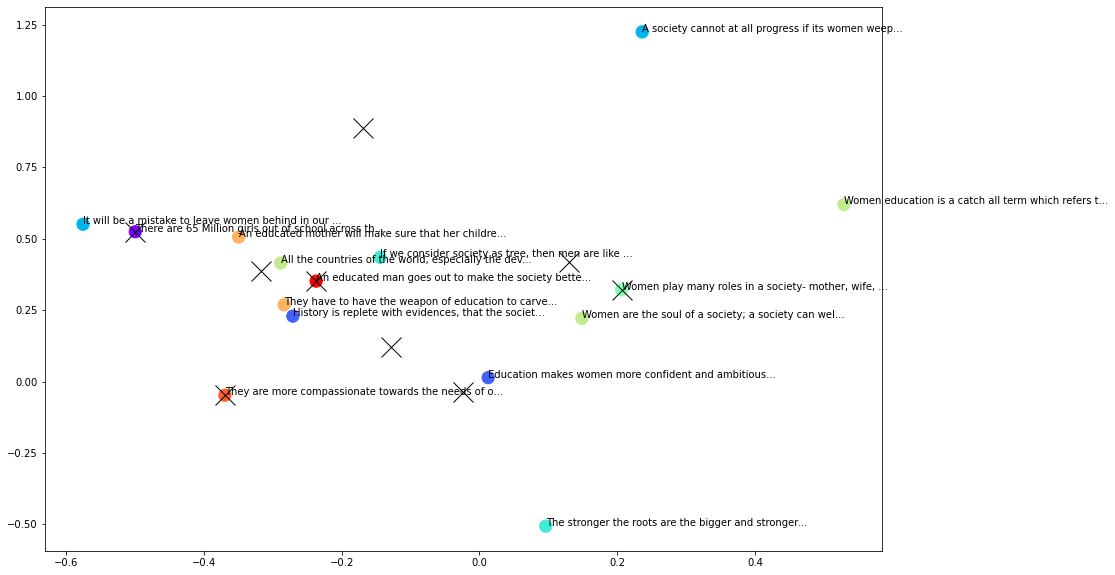

In [11]:
# visualize cluserters - each cluster is the same colour, one sentence is taken from each cluster for summarization 
import matplotlib.pyplot as plt

labels = km.labels_

fig = plt.subplots(figsize=(15,10))
plt.scatter(embeddings[:,0], embeddings[:,1], s = 150, c=labels, cmap='rainbow')

# plot centroids as X's 
for i in range(n_clusters):
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx', markersize=20)

# annotate points with first part of each sentence 
for i, sent in enumerate(sentences):
    plt.annotate(sent[0:50] + '...', (embeddings[:,0][i], embeddings[:,1][i]))

plt.show()